In this notebook I'm going to dig a bit more into some of the characteristics between the neutral and toxic comments. 
   - I'm going to separate the dataset into neutral only and all other toxicities to look at things like the distributions for:
        - word counts
        - character count
        - special character count 
        - capitalization count 
        to see if there are noticable differences between the two. 
        - Run hypothesis test to test statistical signficance of differences
----------------------------------------------------------------------------------------------------------------

   - I would also like to start getting into vectorizing the text to see if there are common words that appear in either neutral or toxic text.
        - unigrams
        - bigrams
        - trigrams
---------------------------------------------------------------------------------------------------------------        
   - In this process I will likely need to stem or lemmatize the words in the corpus. I want to reduce dimensionoality of the data, but also want to preserve as much of the integrity of the text and potential nuance between the different types of text, so I'll likely lemmatize since it's less discerning than something like the porter stemmer.
   - I will remove stopwords - I'll use NLTK and sklearns stopwords. If I find that other trivial words come up a lot in either type of text, I'll add in some custom stopwords.

-----------------------------------------------------------------------------------------------------------------
After doing sentiment analysis earlier on with VADER I didn't really look closely enough at that data, so I'd like to create more visualizations for that data as well.

   

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')



from sklearn.feature_extraction.text import CountVectorizer


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/heatherrobbins/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
## read in and split the dataset into neutral comments and non-neutral (so any kind of toxicity)

#using combined all bc I want to look more into the sentiment features
combined_all = pd.read_csv('data/combined_all.csv')

In [42]:
combined_all.head(1)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,comment_text,cleaner_text,compound,...,neu,pos,word count,character count,special characters,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate
0,0,0,0,0,0,0,1,Explanation\nWhy the edits made under my usern...,Explanation Why the edits made under my userna...,0.5574,...,0.897,0.103,43,264,10,17,0,0,0,0


In [43]:
combined_all.isnull().sum()

toxic                  0
severe_toxic           0
obscene                0
threat                 0
insult                 0
identity_hate          0
neutral                0
comment_text           0
cleaner_text           0
compound               0
neg                    0
neu                    0
pos                    0
word count             0
character count        0
special characters     0
capitalized letters    0
swear words            0
misogynist words       0
racial_ethnic slurs    0
lgbtq hate             0
dtype: int64

In [44]:
#separate dataset into neutral and non-neutral


neutral = combined_all[combined_all['neutral'] == 1]
toxic = combined_all[combined_all['neutral'] == 0]

In [45]:
#checking shapes
print(neutral.shape, toxic.shape)

print(neutral.shape[0] + toxic.shape[0])

(143340, 21) (16225, 21)
159565


In [46]:
combined_all.shape

(159565, 21)

In [47]:
## all matches up

In [48]:
neutral['neutral'].value_counts()

1    143340
Name: neutral, dtype: int64

#### Text Features Histogram Comparison

In [49]:
## function to create detailed histograms 

def subplot_histogram(data, axis, mean, title = None, x_label = None, y_label = None, color = None):
    sns.distplot(data, ax = axis, kde = False, hist_kws=dict(edgecolor="k", linewidth=.9, alpha = 0.9), color = color)
    axis.axvline(mean, ls='--', color = 'black', label = f'Mean = {mean}', linewidth = 2)
    axis.set_title(title, pad = 8, fontdict = {'fontsize':14})
    axis.set_xlabel(x_label, labelpad = 6, fontdict = {'fontsize':13})
    axis.set_ylabel(y_label, labelpad = 6, fontdict = {'fontsize':13})
    axis.tick_params(axis = 'both', labelsize = 11)
    axis.legend()
    plt.tight_layout();

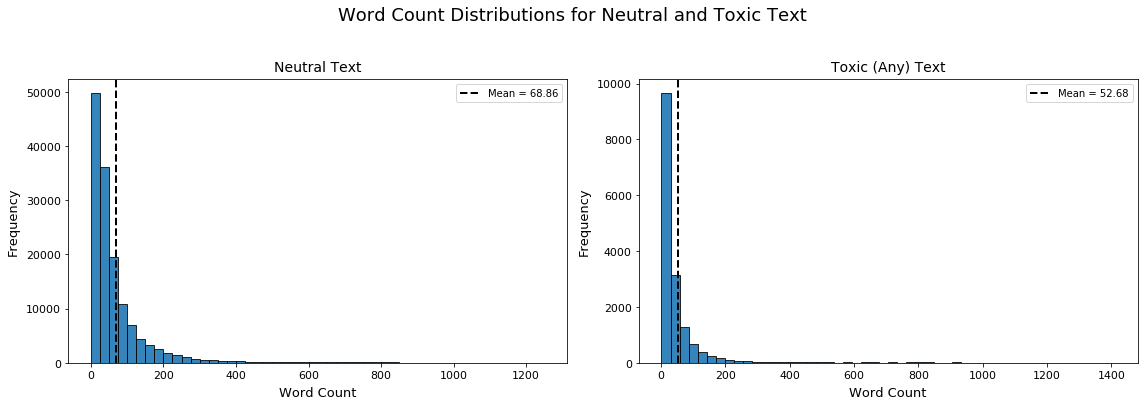

In [50]:
fig, axes = plt.subplots(1, 2, figsize = (16, 5))

ax1 = axes[0]
ax2 = axes[1]

subplot_histogram(neutral['word count'], 
                  axis = ax1,
                  mean = neutral['word count'].mean().round(2),
                  title = 'Neutral Text',
                  x_label = 'Word Count',
                  y_label = 'Frequency')


subplot_histogram(toxic['word count'], 
                  axis = ax2,
                  mean = toxic['word count'].mean().round(2),
                  title = 'Toxic (Any) Text',
                  x_label = 'Word Count',
                  y_label = 'Frequency')


plt.suptitle('Word Count Distributions for Neutral and Toxic Text', y = 1.12, size = 18);

The mean word count for neutral text is 68.86 words, while the mean for toxic text is 52.68 words. 

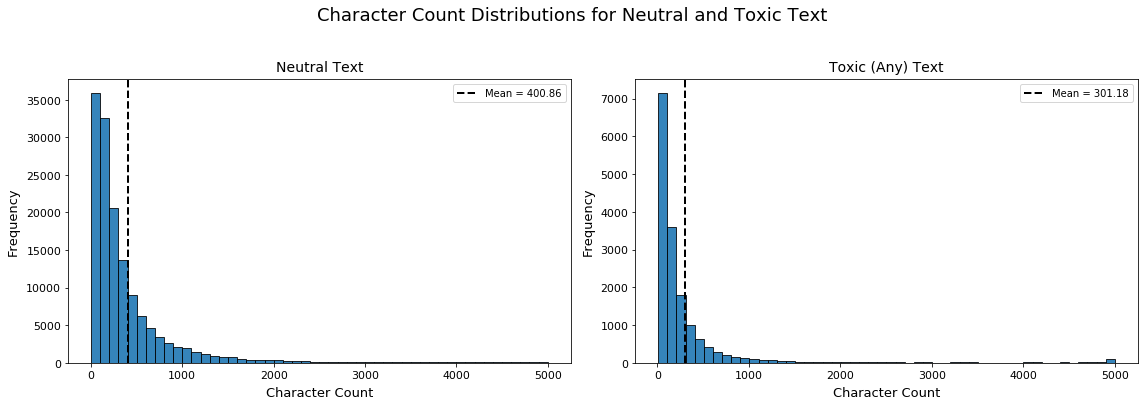

In [51]:
fig, axes = plt.subplots(1, 2, figsize = (16, 5))

ax1 = axes[0]
ax2 = axes[1]

subplot_histogram(neutral['character count'], 
                  axis = ax1,
                  mean = neutral['character count'].mean().round(2),
                  title = 'Neutral Text',
                  x_label = 'Character Count',
                  y_label = 'Frequency')


subplot_histogram(toxic['character count'], 
                  axis = ax2,
                  mean = toxic['character count'].mean().round(2),
                  title = 'Toxic (Any) Text',
                  x_label = 'Character Count',
                  y_label = 'Frequency')


plt.suptitle('Character Count Distributions for Neutral and Toxic Text', y = 1.12, size = 18);

The mean character count for neutral text is 400.84 while the mean for toxic text is 301.18

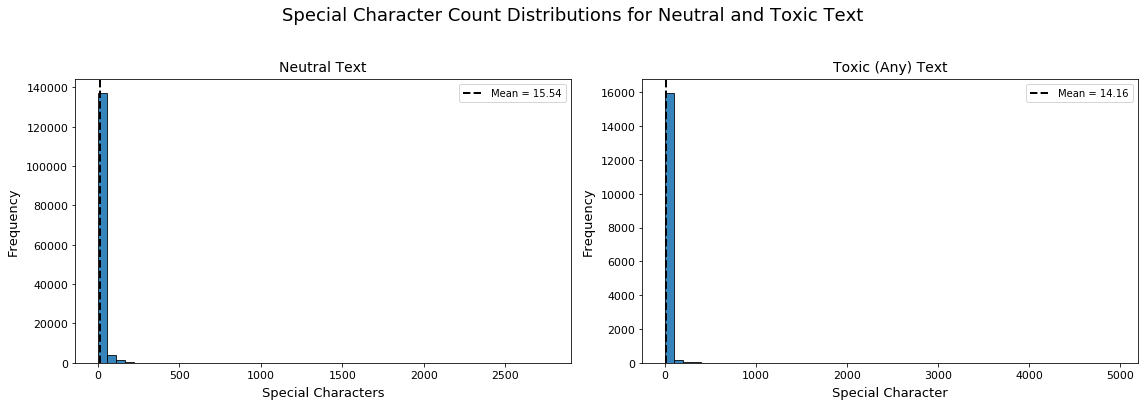

In [52]:
fig, axes = plt.subplots(1, 2, figsize = (16, 5))

ax1 = axes[0]
ax2 = axes[1]

subplot_histogram(neutral['special characters'], 
                  axis = ax1,
                  mean = neutral['special characters'].mean().round(2),
                  title = 'Neutral Text',
                  x_label = 'Special Characters',
                  y_label = 'Frequency')


subplot_histogram(toxic['special characters'], 
                  axis = ax2,
                  mean = toxic['special characters'].mean().round(2),
                  title = 'Toxic (Any) Text',
                  x_label = 'Special Character',
                  y_label = 'Frequency')


plt.suptitle('Special Character Count Distributions for Neutral and Toxic Text', y = 1.12, size = 18);

There's not nearly as much of a difference as I expected. I expected a lot more in toxic text. The mean for netural text is 15.54 and the mean for toxic text is actually slightly less at 14.16.


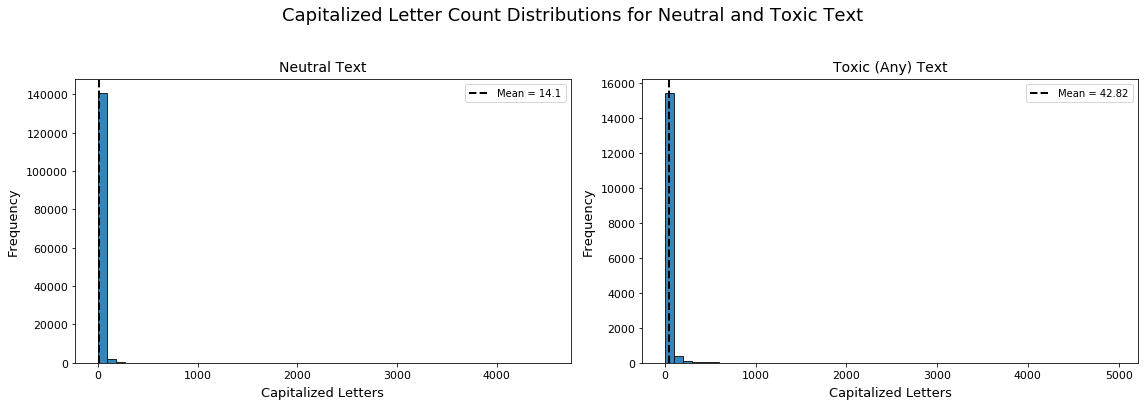

In [53]:
fig, axes = plt.subplots(1, 2, figsize = (16, 5))

ax1 = axes[0]
ax2 = axes[1]

subplot_histogram(neutral['capitalized letters'], 
                  axis = ax1,
                  mean = neutral['capitalized letters'].mean().round(2),
                  title = 'Neutral Text',
                  x_label = 'Capitalized Letters',
                  y_label = 'Frequency')


subplot_histogram(toxic['capitalized letters'], 
                  axis = ax2,
                  mean = toxic['capitalized letters'].mean().round(2),
                  title = 'Toxic (Any) Text',
                  x_label = 'Capitalized Letters',
                  y_label = 'Frequency')


plt.suptitle('Capitalized Letter Count Distributions for Neutral and Toxic Text', y = 1.12, size = 18);

There are way more capitalized letters in toxi text than there are in neutral text. The capitalization could signify yelling at someone, which makes sense for toxic language. The mean for neutral text is 14.1 while the mean for toxic text is 42.82.

##### Text Preprocessing to start looking at common words in each corpus

In [54]:
#get nltk and sklearn stopwords

nltk_stop_words = set(stopwords.words('english'))
sklearn_stop_words = set(CountVectorizer(stop_words = 'english').get_stop_words())

# Print the list of stopwords
# print(nltk_stop_words)
print(len(nltk_stop_words))
# print(sklearn_stop_words)
print(len(sklearn_stop_words))


#combine the set

# Combined list
full_stop_words = nltk_stop_words.union(sklearn_stop_words)
# print(full_stop_words)
print(len(full_stop_words))

179
318
378


In [55]:
#remove stopwords and lemmatize tex

In [56]:
 #instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
        
    # Tokenize 
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [token for token in tokens if token.lower() not in full_stop_words]
    
    # lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    
    # Convert lemmatized tokens back to a sentence
    lemmatized_text = ' '.join(lemmatized_tokens)
    
    return lemmatized_text

In [57]:
neutral.isnull().sum()

toxic                  0
severe_toxic           0
obscene                0
threat                 0
insult                 0
identity_hate          0
neutral                0
comment_text           0
cleaner_text           0
compound               0
neg                    0
neu                    0
pos                    0
word count             0
character count        0
special characters     0
capitalized letters    0
swear words            0
misogynist words       0
racial_ethnic slurs    0
lgbtq hate             0
dtype: int64

In [58]:
neutral['lemmatized_text'] = neutral['cleaner_text'].map(lemmatize_text)
toxic['lemmatized_text'] = toxic['cleaner_text'].map(lemmatize_text)

/Users/heatherrobbins/env3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/heatherrobbins/env3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
neutral.to_csv('neutral.csv', index = False)
toxic.to_csv('toxic.csv', index = False)

In [60]:
neutral.head(1)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,comment_text,cleaner_text,compound,...,pos,word count,character count,special characters,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate,lemmatized_text
0,0,0,0,0,0,0,1,Explanation\nWhy the edits made under my usern...,Explanation Why the edits made under my userna...,0.5574,...,0.103,43,264,10,17,0,0,0,0,Explanation edits username Hardcore Metallica ...


In [61]:
toxic.head(1)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,comment_text,cleaner_text,compound,...,pos,word count,character count,special characters,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate,lemmatized_text
6,1,1,1,0,1,0,0,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,-0.7783,...,0.0,8,44,0,37,1,0,0,0,COCKSUCKER PISS WORK


In [62]:
def vectorize_and_viz(text, ngram_range):
    cvec = CountVectorizer(ngram_range = ngram_range)
    vectorized = cvec.fit_transform(text)
    vector_df = pd.DataFrame(vectorized.todense(), 
                              columns=cvec.get_feature_names())
    
    vector_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');
    

##### Create visualizations for unigram, bigram and trigrams for both neutral and toxic text

In [ ]:
vectorize_and_viz(text = neutral['lemmatized_text'], ngram_range = (1, 1))

#### This keeps killing my kernal. Will start a new notebook and probably switch to collab